# Data Preprocess

把數據轉成理想的樣子。分析或訓練模型之前的準備工作

## Introduction





實務上在收集完資料之後，到真正進入模型之前還有一個重要的環節需要處理，稱為是「資料前處理（Data Preprocessing）」，我們要將資料轉換為適合模型的資料。

那什麼是「適合模型的資料」呢？接著更進一步的定義「適合模型的資料」，我們稱為「模型可以學習（Learniable）」的資料，指的是能夠經由數學模型存取的資料格式，也就是數學上的「向量/矩陣」，在程式當中通常以「Vector/DataFrame」來存放。所以需要被處理的資料指的就是「無法透過數學運算的」，可以簡單分成幾種類型：

* 缺失值或不完整的資料 - Incomplete/Missing Value
* 錯誤或含有不合法字元（亂碼、特殊符號）- Noisy
* 資料型態不一致 - Inconsistent


在這個環節的主要工作就是將資料調整成適合模型的輸入，也有人把這個過程稱為 ETL （Extract-Transform-Load） 。

ETL 用來描述將資料從來源端經過抽取（extract）、轉置（transform）、載入（load）至目的端的過程。ELT 這個字常用在 BI、 Data Pipeline、資料倉儲 領域上。Data Pipeline 是指利用程式自動化定期的資料處理過程，Data Pipeline 其實就是 MLOPs 前面那一段自動化過程。

資料前處理的另外一個工作，在真實的世界中資料往往沒有想像中的「乾淨可用」。在實務中，資料會有資料缺失（Incomplete/Missing data）、雜訊（Noise）、離異值（Outliner）等等的問題，這樣的資料會導致模型無法正常運算。資料前處理泛指的是在分析演算法之前，對資料進行處理跟調整，避免模型因為資料產生的瑕疵而誤判。




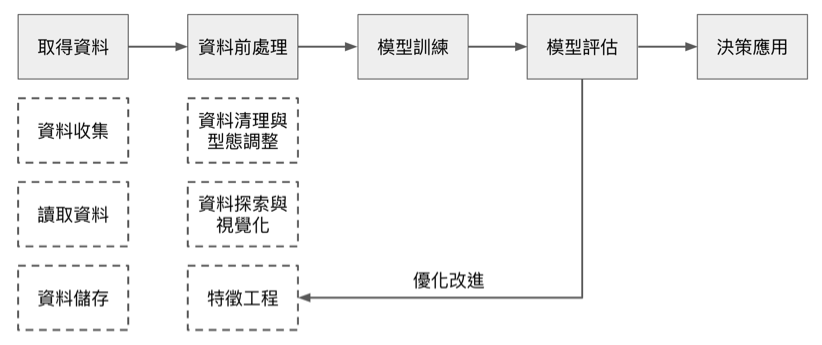

## 資料前處理種類

資料前處理是數據分析和機器學習過程中的一個關鍵步驟，其目的是為了提高數據質量並使其適合於模型訓練和分析。資料前處理通常包括以下幾個步驟：


### 1. 資料清理

資料清理是資料前處理的首要步驟，目的是處理原始數據中的各種問題，確保數據質量。

- **處理缺失值**：缺失值可能會影響模型的性能和準確性。常見的方法包括刪除含有缺失值的樣本、使用均值或中位數填補缺失值，或使用更複雜的插補方法。
- **處理異常值**：異常值是明顯偏離其他數據點的值。可以使用統計方法（如 Z-Score 或 IQR）來檢測和處理異常值。
- **處理重複值**：重複值可能會引入偏差，通常需要刪除。


#### 缺失值

缺失值（Missing Value）是指數據中有特定或者一個範圍的值是不完全的，可能是系統造成的，也可能是人為缺失。依照原因可以分為完全隨機缺失值(missing completely at random)、隨機缺失值(missing at random)、非隨機遺漏(not missing at random)。

面對 Missing Value 的處理策略主要可以分成「刪除」或「填補」兩種策略，可以細分為以下手法：

*   直接刪除含有缺失值的資料或欄位
*   人工填補遺失值
*   常數（0/-1）或通用值（unknown）填補遺失值
*   類似資料/全部資料的統計值填補遺失值
*   利用統計方法進行補值（內差/回歸）
*   利用機器學習方法進行補值（預測）

還有更多方法：

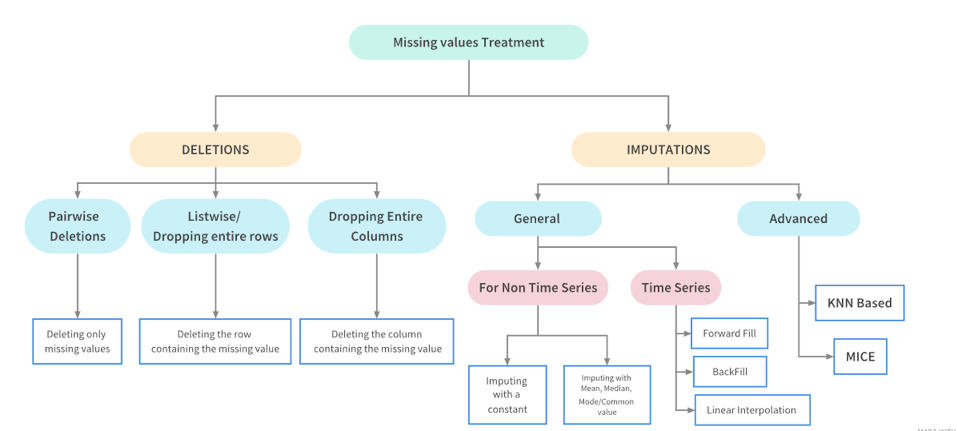


[kaggle 分享的缺失值處理策略](https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values-in-python

)

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer

# 建立一個示例 DataFrame
data = {
    'A': [1, 2, None, 4, 5],
    'B': [None, 2, 3, 4, None],
    'C': [1, None, 3, None, 5]
}
df = pd.DataFrame(data)

# 查看原始數據
print("原始數據：")
print(df)

# 使用均值填補缺失值
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 查看填補後的數據
print("\n填補後的數據：")
print(df_imputed)


原始數據：
     A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  NaN
2  NaN  3.0  3.0
3  4.0  4.0  NaN
4  5.0  NaN  5.0

填補後的數據：
     A    B    C
0  1.0  3.0  1.0
1  2.0  2.0  3.0
2  3.0  3.0  3.0
3  4.0  4.0  3.0
4  5.0  3.0  5.0


#### 異常值

異常值（Outlier）是指在一組數據中明顯偏離其他數據點的數值。這些異常數據點可能顯示數據中的錯誤或揭示有趣的現象。在統計學和數據分析中，異常值通常具有以下特徵：

1. 與大多數數據點的距離較遠：異常值通常在數據集中明顯偏離平均值或其他數據點。
2. 數據分佈中的極端值：在數據分佈中，異常值通常位於極端位置，如分佈的尾部。
3. 影響統計測量：異常值可以顯著影響統計測量，如均值和標準差，從而影響數據分析和建模結果。

檢測異常值的方法有很多，這裡介紹兩種常見的方法：使用 Z-Score 和 IQR（四分位距）。



**使用 Z-Score 檢測異常值**

Z-Score 方法假設數據遵循正態分佈，計算每個數據點與平均值的偏差，以標準差為單位。如果數據點的 Z-Score 絕對值大於某個閾值（通常為3），則被認為是異常值。



In [19]:
import numpy as np

# 建立一個示例 DataFrame
data = {
    'A': [1, 2, 3, 4, 5, 6, 7, 100],  # 100 是一個異常值
    'B': [10, 20, 30, 40, 50, 60, 70, 80]
}
df = pd.DataFrame(data)

# 計算 Z-Score
z_scores = np.abs((df - df.mean()) / df.std())
print(z_scores)

# 設定 Z-Score 閾值
threshold = 2

# 檢測異常值
outliers = (z_scores > threshold)
print("Z-Score 檢測異常值：")
print(outliers)


          A         B
0  0.441176  1.428869
1  0.411765  1.020621
2  0.382353  0.612372
3  0.352941  0.204124
4  0.323529  0.204124
5  0.294118  0.612372
6  0.264706  1.020621
7  2.470588  1.428869
Z-Score 檢測異常值：
       A      B
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False
5  False  False
6  False  False
7   True  False


**使用 IQR 檢測異常值**

IQR 方法不假設數據分佈，通過計算第一四分位數和第三四分位數之間的距離來檢測異常值。數據點如果超過這個範圍的1.5倍，則被認為是異常值。

In [17]:
# 使用 IQR 檢測異常值
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# 檢測異常值
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("IQR 檢測異常值：")
print(outliers)


IQR 檢測異常值：
       A      B
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False
5  False  False
6  False  False
7   True  False


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27396 (\N{CJK UNIFIED IDEOGRAPH-6B04}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

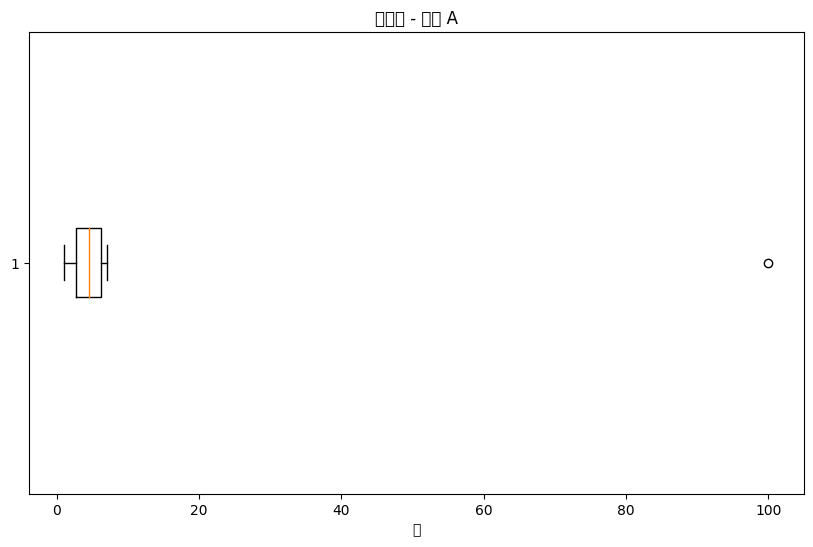

異常值：
     A   B
7  100  80


In [18]:
import matplotlib.pyplot as plt

# 繪製箱型圖
plt.figure(figsize=(10, 6))
plt.boxplot(df['A'], vert=False)
plt.xlabel('值')
plt.title('箱型圖 - 欄位 A')
plt.show()

# 使用 IQR 方法檢測異常值
Q1 = df['A'].quantile(0.25)
Q3 = df['A'].quantile(0.75)
IQR = Q3 - Q1

# 定義異常值的條件
outliers = (df['A'] < (Q1 - 1.5 * IQR)) | (df['A'] > (Q3 + 1.5 * IQR))

# 列印異常值
print("異常值：")
print(df[outliers])

解析箱型圖

* 中位數（Median）：箱體內的中線表示數據的中位數。
* 第一四分位數（Q1）和第三四分位數（Q3）：箱體的上下邊界分別表示數據的第一和第三四分位數。
* 盒鬚（Whiskers）：盒鬚延伸到數據的範圍內，通常為1.5倍的 IQR（四分位距）。
* 異常值（Outliers）：位於盒鬚之外的數據點，這些點被認為是異常值。


#### 刪除重複值

In [22]:
import pandas as pd

# 建立一個示例 DataFrame
data = {
    'A': [1, 2, 2, 4, 5, 5, 5, 8],
    'B': ['a', 'b', 'b', 'd', 'e', 'e', 'e', 'h']
}
df = pd.DataFrame(data)

# 查看原始數據
print("原始數據：")
df


原始數據：


,A,B
0,1,a
1,2,b
2,2,b
3,4,d
4,5,e
5,5,e
6,5,e
7,8,h


In [23]:
# 刪除重複值
df_no_duplicates = df.drop_duplicates()

# 查看刪除重複值後的數據
print("\n刪除重複值後的數據：")
df_no_duplicates



刪除重複值後的數據：


,A,B
0,1,a
1,2,b
3,4,d
4,5,e
7,8,h


### 2. 資料轉換

資料轉換是將數據轉換為適合分析和建模的格式。

- **標準化和正規化**：將數據轉換到同一尺度，使模型訓練過程中不同特徵具有可比性。標準化將數據轉換為均值為0、標準差為1的分佈；正規化將數據縮放到特定區間（如0到1）。
- **類別資料處理**：將類別型變數轉換為數值型變數。常見的方法包括 One-Hot 編碼、Label 編碼。
- **對數變換**：對於具有右偏分佈的數據，可以使用對數變換來減少偏態。

#### 資料型態轉換

需要被處理的資料是指無法透過數學運算的資料，也就是空值和字串兩種。空值的部分我們在資料清理的階段處理，接下來來處理字串的資料。我們可以將資料分成「數字」、「字串」和「布林」三種類型。

針對資料的特性再近一步細分：

* 類別型 (categorical)
** 有序的
** 無序的

* 數值型（numerical）
** 連續的
** 離散的

* 其他（非結構型資料）
** 時序型
** 文本型
** 影像型

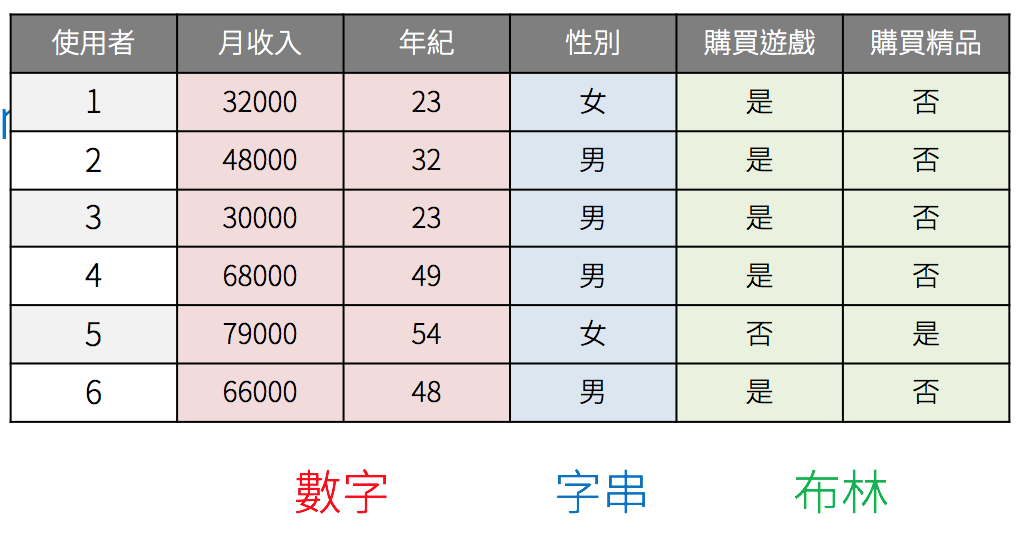

你可能發現問題了，不是所有資料都可以被放入機器中！

##### Label Encoding

但原本的資料如果是無序的類別字串直接使用標籤編碼法會有點問題，以這個例子來說，會讓原本應該無序的水果間產隱含大小的關係出現。而我們在模型當中，很常會使用「大小」來表示資料間的關係。



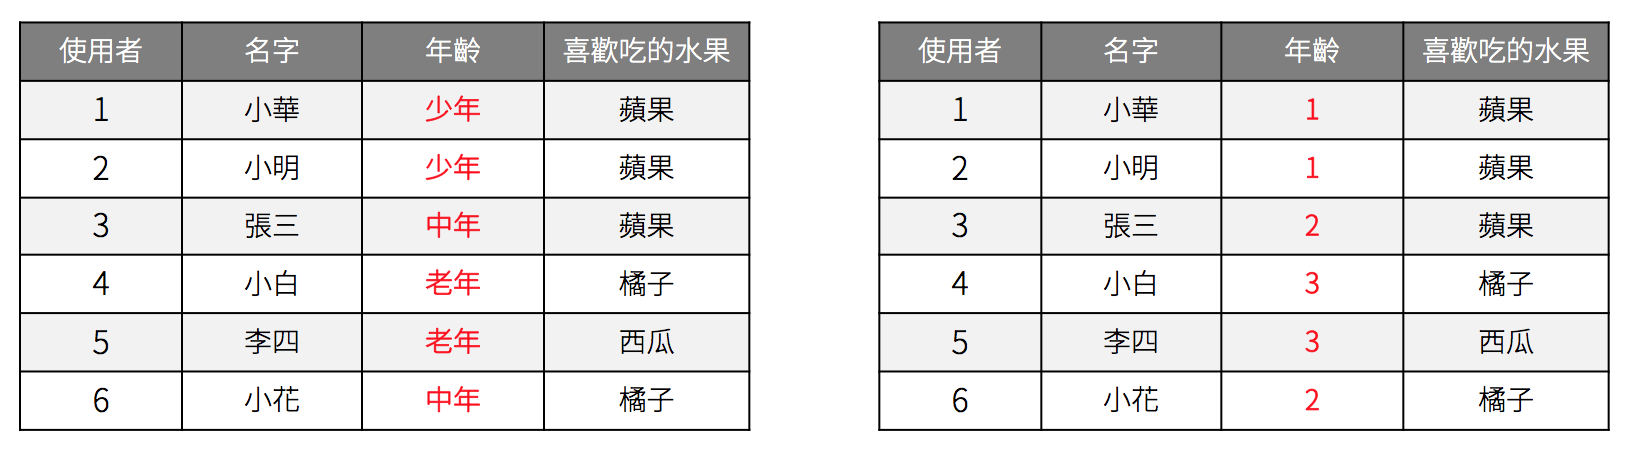

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 建立一個示例 DataFrame
data = {
    'color': ['red', 'blue', 'green', 'blue', 'green', 'red']
}
df = pd.DataFrame(data)

# 查看原始數據
print("原始數據：")
df


原始數據：


,color
0,red
1,blue
2,green
3,blue
4,green
5,red


In [25]:
# 創建 LabelEncoder 物件
label_encoder = LabelEncoder()

# 對 'color' 列進行編碼
df['color_encoded'] = label_encoder.fit_transform(df['color'])

# 查看編碼後的數據
print("\nLabel Encoding 後的數據：")
df


Label Encoding 後的數據：


,color,color_encoded
0,red,2
1,blue,0
2,green,1
3,blue,0
4,green,1
5,red,2


##### One-Hot Encoding / Dummy Variable

但原本的資料如果是無序的類別字串直接使用標籤編碼法會有點問題，以這個例子來說，會讓原本應該無序的水果間產隱含大小的關係出現。而我們在模型當中，很常會使用「大小」來表示資料間的關係。




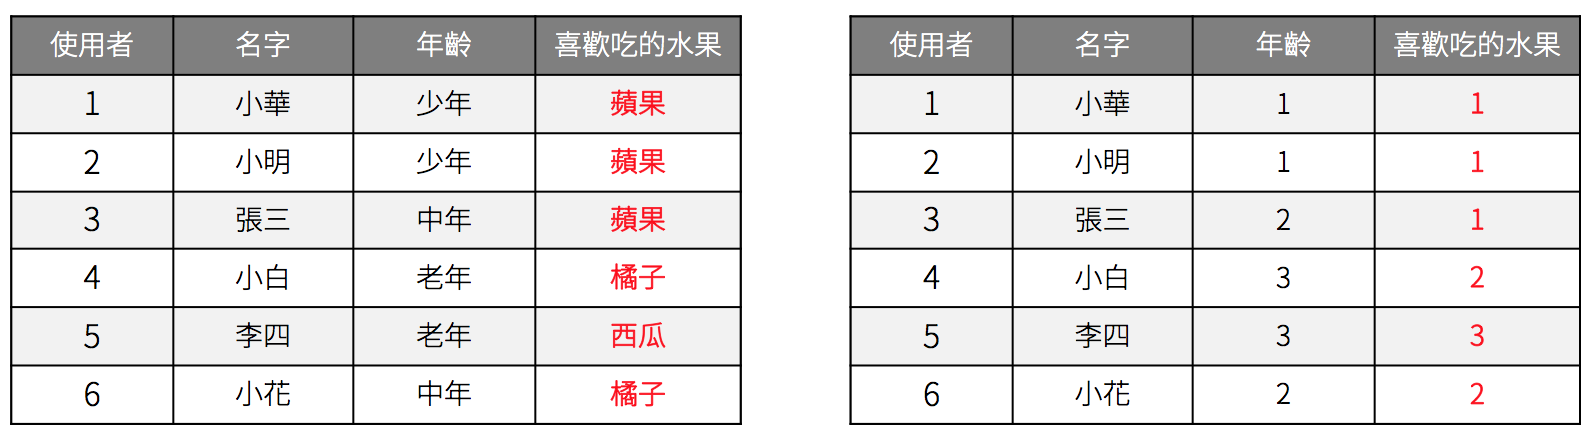

因此，無序類別字串轉數值會採用另一種方法，稱為是獨熱編碼（One-Hot Encoding）或虛擬變量（Dummy Variable）的方法。這種方式會將原本欄位的資料轉換鍋的欄位，藉此來維持資料就的無序關係。



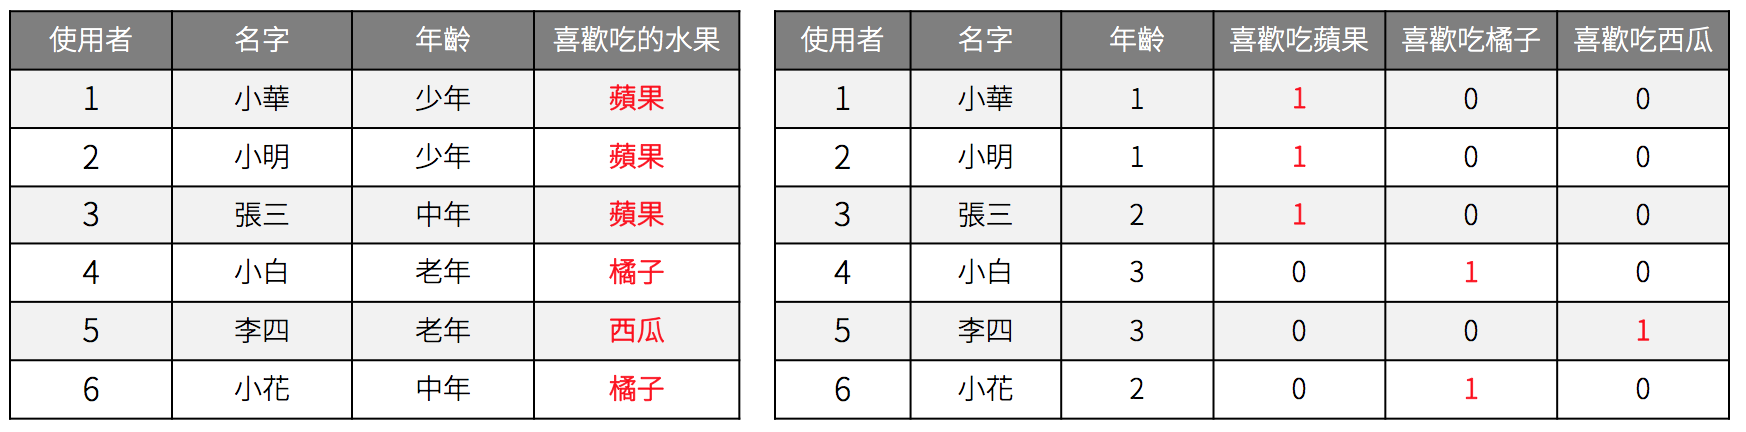


In [26]:
import pandas as pd

# 建立一個示例 DataFrame
data = {
    'color': ['red', 'blue', 'green', 'blue', 'green', 'red']
}
df = pd.DataFrame(data)

# 查看原始數據
print("原始數據：")
df



原始數據：


,color
0,red
1,blue
2,green
3,blue
4,green
5,red


In [27]:

# 使用 pandas 的 get_dummies 進行 One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=['color'])

# 查看編碼後的數據
print("\nOne-Hot Encoding 後的數據：")
df_one_hot


One-Hot Encoding 後的數據：


,color_blue,color_green,color_red
0,False,False,True
1,True,False,False
2,False,True,False
3,True,False,False
4,False,True,False
5,False,False,True


##### 小結

Label Encoding

* 優點
** 簡單直觀：實現簡單，容易理解。
** 節省內存：相比 One-Hot Encoding，節省內存，因為它不需** 要額外的列。

* 缺點
** 可能引入順序關係：在某些情況下，類別之間沒有固有的順序，但編碼後會引入順序關係，這可能會誤導算法。
** 適用於樹模型：對於樹模型（如決策樹、隨機森林等），這種編碼方式是適用的，但對於線性模型可能不合適。
** 使用場景
適合類別之間有固有順序的情況，如等級（低、中、高）。
適合樹模型等不受數值間距影響的算法。




One-Hot Encoding


* 優點

** 避免引入順序關係：不會引入類別之間的順序關係，適合無序類別型數據。
** 適用於大多數模型：適用於各種機器學習模型，特別是線性模型。

* 缺點

** 高內存需求：當類別數量較多時，會增加特徵數，導致內存需求大幅增加。
** 增加計算複雜度：特徵數增加後，訓練模型的計算複雜度也會增加。
使用場景
** 適合類別之間沒有固有順序的情況，如顏色（紅色、藍色、綠色）。
適合線性模型和神經網絡等對數值間距敏感的算法。

筆記：在資料科學中，這兩種編碼對於模型的理解是截然不同。當我們使用 Label encoding 時模型會自然的了解 1 比 2 小，100 比 50 大這樣的關係。而我們是否會需要讓模型學會這樣的關係呢？這就要判斷該欄位是否有這樣的特性來決定

##### 重點整理：為什麼 One-Hot Encoding 不好以及替代方案



###### 一、Categorical Feature的常見處理方法
1. **Drop Categorical Feature**：直接丟棄類別型特徵，只使用數值型特徵進行訓練和預測。
2. **Ordinal Encoding（Label Encoding）**：將類別型特徵轉換成0~N-1的數值。
3. **One Hot Encoding**：新增多個列，用0與1表示原本特徵是否屬於某類別。

###### 二、為什麼 One-Hot Encoding 不好
1. **增加維度**：
   - One-Hot Encoding 會大幅增加特徵的數量，可能導致資料變成高維度，這對大部分的機器學習模型不利。
   - 維度過高會引發「維度詛咒」，讓模型不容易收斂、不易泛化，增加計算資源和時間需求。

2. **大量的0值**：
   - One-Hot Encoding 會產生大量的0值，這些0值會使得模型在進行優化時計算梯度變得困難。
   - 大量0值也會導致特徵重要性低，特徵之間的獨立性假設不成立。

###### 三、替代方案
1. **Frequency Encoding**：
   - 將每個類別的出現頻率作為該類別的數值。例如，「紅色/藍色/黃色」被轉換成「90/50/10」。
   - 優點：簡單、能有效利用資料中類別出現頻率的資訊。
   - 缺點：不同類別有相同頻率時可能會影響模型。

2. **Target Encoding**（Mean Encoding）：
   - 將每個類別對應的目標值平均值作為該類別的數值。例如，顏色為「藍色」的資料中，目標值平均為40，則藍色被轉換成40。
   - 優點：能強化類別特徵與目標變量之間的關係。
   - 缺點：需要處理異常值，避免模型過於依賴 Target Encoding 的數值。

###### 使用工具
- **Category Encoders**：
  - 可以使用 `category_encoders` package 進行 Frequency Encoding 和 Target Encoding。
  - 例如：
    ```python
    pip install category_encoders
    ```
    ```python
    from category_encoders import TargetEncoder
    
    enc = TargetEncoder(cols=['CHAS', 'RAD'])
    training_numeric_dataset = enc.fit_transform(X_train, y_train)
    testing_numeric_dataset = enc.transform(X_test)
    ```

###### 進階方法
- **Beta Target Encoding**：
  - 是一種改良的 Target Encoding 方法，在多個競賽中取得了良好的效果。

##### 參考資料
- [Category Encoders Package Documentation](https://contrib.scikit-learn.org/category_encoders/)
- [Beta Target Encoding](https://mattmotoki.github.io/beta_target_encoding/)

以下為 target encoding 介紹

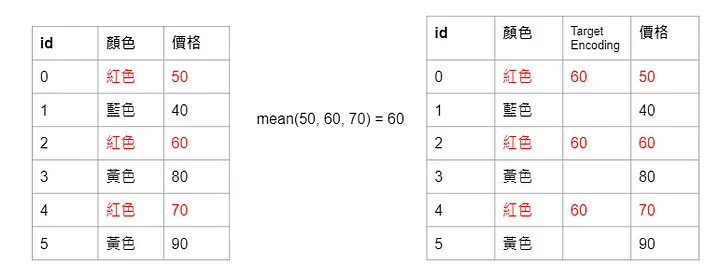

[不要再做One Hot Encoding！！
](https://axk51013.medium.com/%E4%B8%8D%E8%A6%81%E5%86%8D%E5%81%9Aone-hot-encoding-b5126d3f8a63)

##### 其他資料類別

* 時序型（Time-Series）：
 * 編碼方式：時間特徵提取（年、月、日、星期）、滯後變量、移動平均
 * 示例：股票價格、天氣數據


* 文本型（Text）：
 * 編碼方式：詞袋模型（Bag of Words）、TF-IDF、詞嵌入（Word Embeddings，如 Word2Vec、GloVe）、BERT 等預訓練模型
 * 示例：新聞文章、產品評論


* 影像型（Image）：
 * 編碼方式：像素值矩陣、卷積神經網絡（CNN）特徵提取
 * 示例：圖片分類、物體檢測

#### 標準化和正規化

有人說這算是「特徵縮放」的一種，但我還是會將這種針對特徵（features）進行處理的方式，依照工程難易度分開。我會將簡單一點的特徵工程視為資料轉換中，因為這類型的工程通常不需要判斷，大部分有做就會比較好。而另外一種，則是需要更高級的工程並且需要經過判斷才能較好地使用，我則將它歸類為特徵工程中。


特徵縮放是資料前處理的一個很重要的關鍵，只少有部分的Model不需要做特徵縮放，像是決策樹以及隨機森林。需要特徵縮放主要是因為Model背後是用空間中的距離來做區分，假設某一個特徵過大，該Model的成本函數會被這個特徵所支配。另外在吳恩達的機器學習課程中有提到特徵縮放後能夠讓我們在做梯度下降時收斂更快。

舉例來說當某一個特徵範圍在零到兩千之間、另一個為一到五，當我們在做梯度下降時，整個等高線圖會呈現橢圓的形狀，因此收斂時沒辦法直接朝圓心(最低點)前進。若有更多興趣可參考吳恩達在Coursera上的課程。





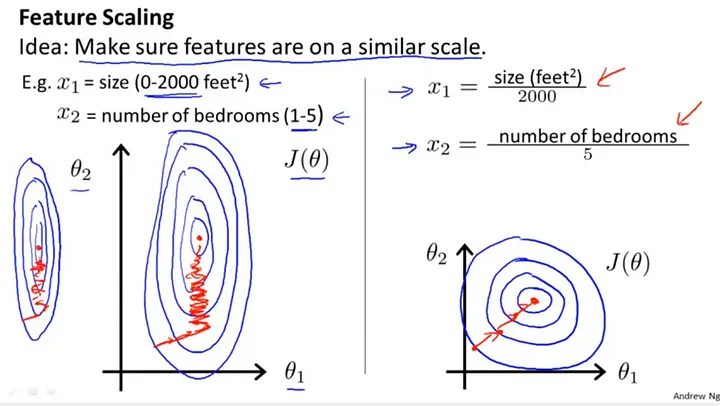

###### 標準化（Standardization）
- **定義**：標準化是將數據轉換為均值為0、標準差為1的分佈。標準化的公式是：

  \[
  $z = \frac{(X - \mu)}{\sigma}$
  \]

  其中，\(X\) 是原始數據，\(\mu\) 是數據的均值，\(\sigma\) 是數據的標準差。
- **目的**：標準化消除了不同特徵之間的量綱，使得不同特徵具有相同的尺度，適合於需要計算距離或相似性的算法，如KNN、線性回歸、支持向量機等。
- **應用場景**：特徵值範圍相差較大或分佈不同的數據集，特別是在需要保持數據的分佈特徵時。


In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 建立示例數據
data = {
    'feature1': [10, 20, 30, 40, 50],
    'feature2': [100, 200, 300, 400, 500]
}
df = pd.DataFrame(data)

# 查看原始數據
print("原始數據：")
print(df)

# 標準化數據
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

# 轉換為 DataFrame 格式
standardized_df = pd.DataFrame(standardized_data, columns=df.columns)

# 查看標準化後的數據
print("\n標準化後的數據：")
print(standardized_df)


原始數據：
   feature1  feature2
0        10       100
1        20       200
2        30       300
3        40       400
4        50       500

標準化後的數據：
   feature1  feature2
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214


###### 正規化（Normalization）
- **定義**：正規化是將數據縮放到特定區間（如0到1）。常見的正規化方法是 Min-Max 正規化，其公式是：
  \[
  $X' = \frac{(X - X_{\text{min}})}{(X_{\text{max}} - X_{\text{min}})}$

  \]
  其中，\(X\) 是原始數據，\(X_{\text{min}}) 和 \(X_{\text{max}}\) 分別是數據的最小值和最大值。
- **目的**：正規化將數據縮放到相同範圍內，適合於需要數據值在固定區間內的算法，如神經網絡、K-means聚類等。
- **應用場景**：特徵值範圍相差較大或需要將數據縮放到特定範圍時。

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 建立示例數據
data = {
    'feature1': [10, 20, 30, 40, 50],
    'feature2': [100, 200, 300, 400, 500]
}
df = pd.DataFrame(data)

# 查看原始數據
print("原始數據：")
print(df)

# 正規化數據
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

# 轉換為 DataFrame 格式
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

# 查看正規化後的數據
print("\n正規化後的數據：")
print(normalized_df)


原始數據：
   feature1  feature2
0        10       100
1        20       200
2        30       300
3        40       400
4        50       500

正規化後的數據：
   feature1  feature2
0      0.00      0.00
1      0.25      0.25
2      0.50      0.50
3      0.75      0.75
4      1.00      1.00



### 3. 特徵工程

特徵工程是創建新的特徵或改進現有特徵，以提高模型的性能。

- **特徵選擇**：從原始數據中選擇對模型最有用的特徵，可以使用統計方法（如卡方檢驗、互信息）或模型方法（如隨機森林重要性、Lasso 回歸）。
- **特徵創建**：基於現有數據創建新特徵，例如，時間數據可以提取出年月日，地理數據可以計算距離等。
- **特徵縮放**：將數據縮放到較小的維度，以減少計算複雜度和過擬合風險。常用的方法包括 PCA（主成分分析）和 LDA（線性判別分析）。

###### 特徵選擇
特徵選擇是指從原始數據中選擇對模型最有用的特徵。這個過程可以提高模型的性能，減少過擬合的風險，並提高模型的可解釋性。常用的方法包括：

1. **統計方法**：
   - **卡方檢驗**：主要用於分類問題，測試特徵與目標變量之間的獨立性。
   - **互信息**：衡量特徵與目標變量之間的相依性。

2. **模型方法**：
   - **隨機森林重要性**：利用隨機森林模型計算每個特徵的重要性。
   - **Lasso 回歸**：通過L1正則化進行特徵選擇。

範例：使用隨機森林選擇特徵


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd

# 加載數據
data = load_iris()
X, y = data.data, data.target

# 訓練隨機森林
model = RandomForestClassifier()
model.fit(X, y)

# 獲取特徵重要性
importances = model.feature_importances_

# 將特徵重要性轉換為DataFrame
feature_importances = pd.DataFrame(importances, index=data.feature_names, columns=["Importance"])

print(feature_importances)

                   Importance
sepal length (cm)    0.091379
sepal width (cm)     0.018404
petal length (cm)    0.385758
petal width (cm)     0.504458


###### 特徵創建
特徵創建是基於現有數據創建新的特徵。例如，可以從時間數據中提取出年月日，或者從地理數據中計算距離。這些新特徵可能包含更有用的信息，從而提高模型的性能。

範例：從時間戳提取日期特徵

In [31]:
import pandas as pd

# 創建示例數據
df = pd.DataFrame({
    'timestamp': pd.date_range(start='2022-01-01', periods=5, freq='D')
})

# 提取年月日特徵
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day

print(df)

   timestamp  year  month  day
0 2022-01-01  2022      1    1
1 2022-01-02  2022      1    2
2 2022-01-03  2022      1    3
3 2022-01-04  2022      1    4
4 2022-01-05  2022      1    5



###### 特徵縮放
特徵縮放是將數據縮放到較小的維度，以減少計算複雜度和過擬合風險。常用的方法包括主成分分析（PCA）和線性判別分析（LDA）。

1. **主成分分析（PCA）**：將數據投影到低維空間，最大化數據的方差。
2. **線性判別分析（LDA）**：尋找能夠最大化類間距離與最小化類內距離的投影方向。

範例：使用PCA進行特徵縮放



In [32]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd

# 加載數據
data = load_iris()
X, y = data.data, data.target

# 使用PCA進行降維
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 將降維後的數據轉換為DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['target'] = y

print(df_pca)

         PCA1      PCA2  target
0   -2.684126  0.319397       0
1   -2.714142 -0.177001       0
2   -2.888991 -0.144949       0
3   -2.745343 -0.318299       0
4   -2.728717  0.326755       0
..        ...       ...     ...
145  1.944110  0.187532       2
146  1.527167 -0.375317       2
147  1.764346  0.078859       2
148  1.900942  0.116628       2
149  1.390189 -0.282661       2

[150 rows x 3 columns]




### 4. 資料分割

資料分割是將數據集分割為訓練集、驗證集和測試集，以便進行模型訓練和評估。

- **訓練集**：用於模型訓練。
- **驗證集**：用於模型調參和選擇。
- **測試集**：用於最終評估模型性能。

通常比例：
1. 8:1:1
2. 6:2:2
3. 7:2:1


抽樣

抽樣是從整個數據集中選取一部分數據的過程，目的是在不需要處理全部數據的情況下進行分析。抽樣方法可以提高計算效率、減少資源消耗，並在許多情況下提供充分代表性的信息。

各種抽樣方式

1. **簡單隨機抽樣 (Simple Random Sampling)**：
   - 每個樣本都有相同的機會被選中。
   - 優點：簡單易行。
   - 缺點：可能無法保證各個子集的代表性。
   - **舉例**：從一個包含1000個學生名單的數據集中隨機選取100名學生。
   - 適用情況：數據集相對均質，每個樣本均具有相同的重要性。


2. **系統抽樣 (Systematic Sampling)**：
   - 按照固定間隔選取樣本，例如每隔第k個樣本選取一個。
   - 優點：易於實施，適合大規模數據。
   - 缺點：如果數據有周期性，可能導致偏差。
   - **舉例**：從一個包含1000個產品的數據集中，每隔10個產品選取一個樣本。
   - 適用情況：數據集排序無周期性特徵，樣本量較大。

3. **分層抽樣 (Stratified Sampling)**：
   - 將數據集分為多個子集（分層），然後從每個子集中進行隨機抽樣。
   - 優點：可以保證各個子集的代表性，適合異質性數據。
   - 缺點：需要先了解數據結構並進行分層。
   - **舉例**：在一個包含男女學生的數據集中，按性別分層，然後分別從男性和女性中隨機選取樣本。
   - 適用情況：數據集存在明顯的異質性，可以劃分為多個具有同質性的子集。

4. **群集抽樣 (Cluster Sampling)**：
   - 將數據集分為多個群集（群組），然後隨機選取部分群集，再從選取的群集中抽樣。
   - 優點：適合大規模和地理分散的數據。
   - 缺點：如果群集內部差異大，可能導致偏差。
   - **舉例**：將一個城市的所有學校視為群集，隨機選取幾所學校，然後調查這些學校的所有學生。
   - 適用情況：數據集地理分散，或自然分為多個群集（如學校、區域等）。


抽樣對資料科學的影響

1. **提高計算效率**：
   - 處理大數據時，抽樣可以顯著降低計算量和時間。

2. **資源節約**：
   - 減少計算資源的使用，降低成本。（我們不可能用超大的數據因為跑不動）

3. **提高精度**：
   - 適當的抽樣方法可以提供高精度的估計結果，並且抽樣誤差可以通過統計方法進行估計和控制。通過合理的抽樣設計，可以將樣本結果推廣到整個母體，從而得出有價值的結論。（我們要避免讓模型學習的跟真實世界的情況相似，才是好模型）





簡單分層抽樣範例

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 創建示例數據
data = {
    'feature1': range(100),
    'feature2': range(100, 200),
    'target': [0]*50 + [1]*50  # 分層標籤
}
df = pd.DataFrame(data)

# 分層抽樣
X = df[['feature1', 'feature2']]
y = df['target']

# 分割數據集為訓練集和測試集，進行分層抽樣
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 顯示訓練集和測試集的目標值比例
print('訓練集目標值比例:')
print(y_train.value_counts(normalize=True))
print('\n測試集目標值比例:')
print(y_test.value_counts(normalize=True))

訓練集目標值比例:
target
1    0.5
0    0.5
Name: proportion, dtype: float64

測試集目標值比例:
target
0    0.5
1    0.5
Name: proportion, dtype: float64


### 5. 資料增強

資料增強是通過生成新的訓練樣本來增加數據集的大小和多樣性。

- **過採樣和欠採樣**：用於處理不平衡數據。過採樣是增加少數類別的樣本數，欠採樣是減少多數類別的樣本數。
- **數據擴充**：主要用於圖像數據集，包括旋轉、平移、翻轉等方法來生成新的圖像數據。


###### 過採樣和欠採樣

這兩種方法主要用於處理不平衡數據 (Imbalanced Data)
，即不同類別的樣本數量差異很大的情況。

不平衡數據是指數據集中不同類別的樣本數量相差較大的情況。這在實際應用中非常常見，例如欺詐檢測、醫療診斷和故障檢測等。由於某些類別的樣本數量遠少於其他類別，導致模型在訓練過程中可能偏向於多數類別，從而降低對少數類別的預測性能。


在網路資安領域，不平衡數據非常常見，主要是因為正常的活動和異常的活動（如網絡攻擊、欺詐行為等）之間存在巨大差異。大部分時間和數據流量都是正常的，僅有少量數據是異常或惡意的。因此，識別和處理這些少數異常數據是網路資安中的一個挑戰。

異常偵測（Anomaly Detection）在網路安全領域是一種重要的技術，用來識別和應對網絡中不正常的行為或事件。這些不正常的行為或事件通常是潛在的安全威脅，例如網絡攻擊、未經授權的存取、惡意軟體活動等。





1. **過採樣 (Oversampling)**：
   - **介紹**：過採樣是通過增加少數類別的樣本數來平衡數據集。常見的方法包括複製少數類別的樣本或生成新樣本（如SMOTE方法）。
   - **優點**：增加少數類別的樣本數，減少模型的偏差。
   - **缺點**：可能導致過擬合，因為增加的樣本可能是原樣本的複製品。

   **範例**：使用SMOTE方法進行過採樣


In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import pandas as pd

# 創建不平衡數據集
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=42)

# 使用SMOTE進行過採樣
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 顯示過採樣後的數據分佈
print('過採樣後的數據分佈:')
print(pd.Series(y_resampled).value_counts())


過採樣後的數據分佈:
0    900
1    900
Name: count, dtype: int64


2. **欠採樣 (Undersampling)**：
   - **介紹**：欠採樣是通過減少多數類別的樣本數來平衡數據集。常見的方法包括隨機刪除多數類別的樣本。
   - **優點**：減少多數類別的樣本數，降低計算複雜度。
   - **缺點**：可能導致信息丟失，因為減少的樣本可能包含重要信息。

   **範例**：使用隨機欠採樣


In [35]:
   from imblearn.under_sampling import RandomUnderSampler
   from sklearn.datasets import make_classification
   import pandas as pd

   # 創建不平衡數據集
   X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=42)

   # 使用隨機欠採樣
   rus = RandomUnderSampler(random_state=42)
   X_resampled, y_resampled = rus.fit_resample(X, y)

   # 顯示欠採樣後的數據分佈
   print('欠採樣後的數據分佈:')
   print(pd.Series(y_resampled).value_counts())

欠採樣後的數據分佈:
0    100
1    100
Name: count, dtype: int64




###### 數據擴充

數據擴充主要用於圖像數據集。通過對圖像進行各種變換，可以生成新的圖像數據，從而增加數據集的多樣性，減少過擬合。

**具體舉例**：

1. **旋轉 (Rotation)**：
   - 將圖像旋轉一定角度（如90度、180度、270度）來生成新圖像。

2. **平移 (Translation)**：
   - 將圖像向上、下、左、右平移一定距離來生成新圖像。

3. **翻轉 (Flip)**：
   - 將圖像水平或垂直翻轉來生成新圖像。

4. **縮放 (Scaling)**：
   - 將圖像放大或縮小來生成新圖像。

5. **裁剪 (Cropping)**：
   - 從圖像的不同部分裁剪出小塊來生成新圖像。

6. **改變亮度 (Brightness Adjustment)**：
   - 增加或減少圖像的亮度來生成新圖像。

這些數據擴充技術可以顯著增加圖像數據集的大小和多樣性，提高模型的泛化能力，從而在不同環境和條件下仍能保持良好的性能。

# References

1. [[資料分析&機器學習] 第2.4講：資料前處理(Missing data, One-hot encoding, Feature Scaling)
](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC2-4%E8%AC%9B-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-missing-data-one-hot-encoding-feature-scaling-3b70a7839b4a)

2. [資料前處理必須要做的事 - 資料清理與型態調整
](https://blog.v123582.tw/2020/12/04/%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86%E5%BF%85%E9%A0%88%E8%A6%81%E5%81%9A%E7%9A%84%E4%BA%8B-%E8%B3%87%E6%96%99%E6%B8%85%E7%90%86%E8%88%87%E5%9E%8B%E6%85%8B%E8%AA%BF%E6%95%B4/#:~:text=%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86%E7%9A%84%E4%B8%89%E5%80%8B%E9%9D%A2%E5%90%91&text=%E5%9C%A8%E9%80%99%E5%80%8B%E7%92%B0%E7%AF%80%E7%9A%84%E4%B8%BB%E8%A6%81,load%EF%BC%89%E8%87%B3%E7%9B%AE%E7%9A%84%E7%AB%AF%E7%9A%84%E9%81%8E%E7%A8%8B%E3%80%82)